In [2]:
# import 
import vectorbt as vbt
import numpy as np
import pandas as pd
import os
import sys

sys.path.insert(1, os.path.expanduser('~/Systematic-Sherpa/'))

import backoffice.walk_forward.walkforward_opt as opt
import backoffice.vbt_plot.optimize_plot as optplot

In [3]:
symbols = ["BTC-USD"]
data = vbt.YFData.download(symbols, missing_index='drop').get('Close')

price = opt.in_sample_prices(data, 28, 360, 108)
fast_ma, slow_ma = vbt.MA.run_combs(price, window=np.arange(1, 25), r=2, short_names=['fast', 'slow'])


entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf = vbt.Portfolio.from_signals(price, entries, exits)
res = pf.total_return()

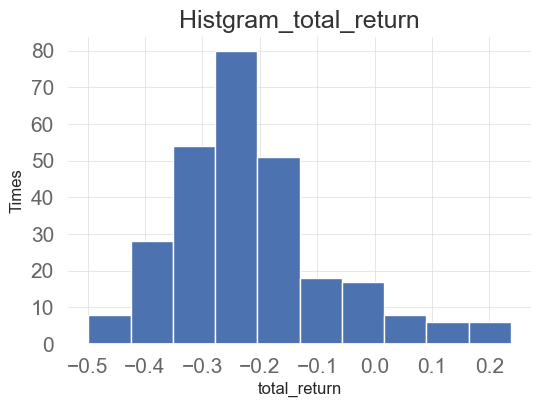

In [6]:
res_df = pd.DataFrame(res).reset_index()

for i in range(28):
    optplot.two_parameter_plot(res_df[res_df['split_idx'] == i], "total_return", "fast_window", 'slow_window')